Abans d'entregar, assegureu-vos que tot el bloc funciona correctament. Primer, **reinicieu el kernel** (al menú, trieu Kernel$\rightarrow$Restart) i després **executeu totes les cel·les** (al menú, trieu Cell$\rightarrow$Run All).

Assegureu-vos d'emplenar a tot arreu on digui `EL CODI AQUÍ` o "LA RESPOSTA AQUÍ", i també el vostre **NOM**, **COGNOMS** i **NIU** a sota:

In [1]:
NOM = ""
COGNOMS = ""
NIU = "" # (7 dígits)

---

# Pràctica 1

En aquesta pràctica ens familiaritzarem en l'ús de *Sage*. Algunes indicacions que ens poden ser útils:

- `QQ`, `RR`, `CC` són els cossos dels racionals, reals i complexos. També podem treballar a l'anell `ZZ` dels enters, al `SR` (simbòlic), o cossos com `Qbar` (complexos algebraics) i `AA` (reals algebraics).
- El *mètode* `.random_element()` ens retorna un element (pseudo-)aleatori de l'estructura que tinguem. Per exemple, `ZZ.random_element()` ens retornarà un element (pseudo-)aleatori dels enters.
- Per descobrir noves comandes, podeu fer servir el tabulador `<Tab>` per completar els mètodes. Podem obtenir l'ajuda d'una funció o mètode afegint un interrogant al seu nom, com per exemple `ZZ.random_element?`.
- La comanda `range` ens retorna una llista d'enters (mireu com funciona). També és útil la notació `[2,5,..17]`, que ens retornaria la llista `[2,5,8,11,14,17]` (enters en progressió aritmètica).
- Podeu investigar com funciona la creació de llistes "compreses" (*list comprehension* en anglès).
- `Matrix(F, n, m, llista_entrades)` construeix una matriu $n \times m$ en el cos `F`, amb les entrades donades.
- Per resoldre un sistema lineal d'equacions de la forma $Ax=b$, escrivim `A.solve_right(b)`.
- Les funcions `plot` i `scatter_plot` ens permeten fer gràfiques. Estudieu com funcionen!

## Matrius i sistemes d'equacions

Creeu una matriu $A$ de tamany $2\times 3$ amb entrades racionals.

In [2]:
# ESCRIVIU EL CODI AQUÍ
A = Matrix(QQ, 2, 3, [1,2,3,4,5,6]) # Escrivim les entrades en una llista, per files.
A = Matrix(QQ, [[1,2,3],[4,5,6]]) # Escrivim una llista de llistes. Cada llista correspon a una columna. El tamany és opcional
A = Matrix(QQ, 2, 3, 0) # Una possibilitat és crear la matriu 0, simplement posem un zero al lloc de les entrades.
A = MatrixSpace(QQ, 2, 3).random_element() # Aquesta opció ens dona una matriu aleatòria "del conjunt de matrius".

In [3]:
assert A.nrows() == 2
assert A.ncols() == 3
assert A.base_ring() == QQ

Creeu una matriu B de tamany 10 x 20 que tingui per entrades nombres enters aleatoris entre -5 i 5 (inclosos).

In [4]:
# ESCRIVIU EL CODI AQUÍ
B = Matrix(10, 20, [ZZ.random_element(-5,6) for _ in range(10*20)]) # Observeu que -5,6 retorna enters entre -5 i 5 inclosos (però mai 6)

In [5]:
# Una altra opció seria crear una matriu zero i després omplir-la amb un loop:
B = Matrix(10, 20, 0)
for i in range(10):
    for j in range(20):
        B[i, j] = ZZ.random_element(-5,6)

In [6]:
assert B.nrows() == 10
assert B.ncols() == 20
assert B.base_ring() == ZZ
assert max(B[i,j] for i in range(10) for j in range(20)) == 5
assert min(B[i,j] for i in range(10) for j in range(20)) == -5

Creeu una matriu C de tamany 20 x 10 que tingui a l'entrada $(i,j)$ el valor $2i+j$. (la primera entrada és $3$).

In [7]:
# ESCRIVIU EL CODI AQUÍ

In [8]:
# Una primera opció és el que s'anomena *comprehensive list*
C = Matrix(ZZ, 20, 10, [2 * i + j for i in range(1, 21) for j in range(1, 11)])
# També podem indexar a zero, però aleshores hem de recalcular la fórmula:
C = Matrix(ZZ, 20, 10, [2 * (i+1) + (j+1) for i in range(20) for j in range(10)])

Calculeu la matriu $BC$ i trobeu-ne el rang (descobriu com fer-ho amb `SageMath`).

In [9]:
# ESCRIVIU EL CODI AQUÍ
producte = B * C
r = producte.rank() # Podeu descobrir funcions començant a escriure el nom i fent servir TAB.

In [10]:
assert r in ZZ

Creeu una matriu $H$ de tamany 15 x 15 amb entrades racionals que tingui un $1$ a l'entrada $(1,1)$, que tingui $1/2$ a les entrades $(1,2)$ i $(2,1)$, que tingui $1/3$ a les entrades $(1,3), (2,2), (3,1)$, i així successivament.

In [11]:
H = Matrix(QQ,15,15,[1/(i+j+1) for i in range(15) for j in range(15)])

Calculeu la seva inversa $H^{-1}$ i comproveu que $H H^{-1} = H^{-1} H = \text{Id}$.

In [12]:
Hinv = H**-1 # També podem escriure Hinv = H^-1 o Hinv = H^(-1)
prod1 = H * Hinv
prod2 = Hinv * H

In [13]:
# Una manera de comprovar que obtenim la identitat és restant la identitat i mirant com de grans són les entrades.
# La funció `norm` retorna la norma de la matriu, que és l'arrel quadrada de la suma dels quadrats de les entrades.
# Mireu la documentació de la funció per veure què fa, i exemples.
print((prod1 - 1).norm())
print((prod2 - 1).norm())

0.0
0.0


Repetiu el mateix càlcul però inicialitzant $H$ com una matriu en els reals (`RR`). Què observeu?

In [14]:
HR = H.change_ring(RR) # En compte de reinicialitzar H, podem canviar on viuen les entrades
HRinv = H**-1
prod1 = HR * HRinv
prod2 = HRinv * HR

In [15]:
print((prod1-1).norm())
print((prod2-1).norm())

7362.647372676577
7362.647372676577


Observem que la norma queda molt lluny de zero! Això vol dir que no hem pogut calcular la inversa de manera correcta. És una avís que els càlculs aproximats poden donar lloc a resultats molt lluny de la realitat. Sempre que poguem, farem els càlculs exactes.

Trobeu totes les solucions del sistema: (1.1.14)
\begin{eqnarray}
x + 4y + z &= 0\\
4x+13y+7z &= 0\\
7x+22y+13z&=1.
\end{eqnarray}

In [16]:
# Inicialitzem les matrius del sistema i mirem els rangs
A = Matrix(QQ,3,3, [1,4,1,4,13,7,7,22,13])
b = Matrix(QQ,3,1,[0,0,1])
print(A.rank())

2


In [17]:
print(A.augment(b).rank())

3


Com que el rang d'A i el de l'augmentada amb b no coincideixen, el sistema és incompatible

In [18]:
# ESCRIVIU EL CODI AQUÍ
solucions = [] # La llista buida ja és la resposta correcta: no hi ha solucions!

Trobeu totes les solucions del sistema: (1.1.17)
\begin{eqnarray}
x + 2y &= a\\
3x + 5y &= b.
\end{eqnarray}

In [19]:
# ESCRIVIU EL CODI AQUÍ
# A X = t
var('a', 'b')
A = Matrix(SR,2,2,[1,2,3,5]) # SR vol dir "symbolic ring"
t = Matrix(SR,2,1,[a,b])
A.solve_right(t)

[-5*a + 2*b]
[   3*a - b]

In [20]:
# També podem treballar amb fracions de polinomis amb variables a i b
R = QQ['a','b']
a, b = R.gens()
# També podem definir R i a, b a la vegada com:
R.<a, b> = PolynomialRing(QQ)
A = Matrix(R,2,2,[1,2,3,5])
t = Matrix(R,2,1,[a,b])
A.solve_right(t)

[-5*a + 2*b]
[   3*a - b]

In [21]:
# Ull! Millor evitar la comanda 'solve' !

In [22]:
solucions = [A.solve_right(t)]

In [23]:
assert len(solucions) == 1

Discutiu el següent sistema, segons el valor del paràmetre $k$. (1.1.20)
\begin{eqnarray}
x + y - z &= 2\\
x + 2y + z &= 3\\
x+ y + (k^2-5)z &= k.
\end{eqnarray}

In [24]:
var('k')
A = Matrix(SR,3,3,[1, 1, -1, 1, 2, 1, 1, 1, (k^2-5)])
b = Matrix(SR,3,1, [2,3,k])
print(A.rank())
print(A.augment(b).rank())

3
3


Observem que el el sistema sembla compatible determinat. Busquem la solució

In [25]:
A.solve_right(b)

[ 3*(k - 2)/(k^2 - 4) + 1]
[-2*(k - 2)/(k^2 - 4) + 1]
[       (k - 2)/(k^2 - 4)]

Es pot simplificar l'expressió, aplicant la funció `simplify_rational` a les seves entrades. La funció `apply_map` canvia les entrades d'una matriu pel resultat d'aplicar la funció espeficicada. Com que volem aplicar una funció que a cada entrada `o` li faci `o.simplify_rational()`, podem definir una funció directament amb la comanda `lambda`.

In [26]:
A.solve_right(b).apply_map(lambda o : o.simplify_rational())

[(k + 5)/(k + 2)]
[      k/(k + 2)]
[      1/(k + 2)]

In [27]:
# El codi anterior és equivalent a:
def f(o):
    return o.simplify_rational()
A.solve_right(b).apply_map(f)

[(k + 5)/(k + 2)]
[      k/(k + 2)]
[      1/(k + 2)]

Fixem-nos que hi ha un denominador de $k^2-4$. Això pot ser un problema quan $k=\pm 2$.

In [28]:
print(A(k=2).rank())
print(A(k=2).augment(b(k=2)).rank())

2
2


In [29]:
print(A(k=-2).rank())
print(A(k=-2).augment(b(k=-2)).rank())

2
3


In [30]:
A.augment(b)(k=2).rref()

[ 1  0 -3  1]
[ 0  1  2  1]
[ 0  0  0  0]

In [31]:
A.augment(b)(k=-2).rref()

[ 1  0 -3  0]
[ 0  1  2  0]
[ 0  0  0  1]

Observem que per $k=-2$ el sistema és incompatible. Per $k=2$ és compatible indeterminat. Per la resta de $k$, és compatible determinat i hem trobat la solució més enrere.

Resoleu el següent sistema d'equacions, realitzant a mà (fent servir els mètodes `rescale_row`, `add_multiple_of_row` i/o `swap_rows`) les transformacions de files. (1.2.17)
\begin{eqnarray}
 2x_1 + 4x_2 + 3x_3 + 5x_4 + 6x_5 &= 37\\
 4x_1 + 8x_2 + 7x_3 + 5x_4 + 2x_5 &= 74\\
-2x_1 - 4x_2 + 3x_3 + 4x_4 - 5x_5 &= 20\\
  x_1 + 2x_2 + 2x_3 -  x_4 + 2x_5 &= 26\\
 5x_1 - 10x_2 +4x_3 + 6x_4 + 4x_5 &= 24.
\end{eqnarray}

In [32]:
A = Matrix(QQ, [[2, 4, 3, 5, 6],[4, 8, 7, 5, 2],[-2, -4, 3, 4, -5],[1, 2, 2, -1, 2],[5, -10, 4, 6, 4]])
b = Matrix(5, 1, [37,74, 20, 26, 24])

In [33]:
Ab = A.augment(b,subdivide=True); Ab

[  2   4   3   5   6| 37]
[  4   8   7   5   2| 74]
[ -2  -4   3   4  -5| 20]
[  1   2   2  -1   2| 26]
[  5 -10   4   6   4| 24]

In [34]:
Ab.swap_rows(0,3); Ab

[  1   2   2  -1   2| 26]
[  4   8   7   5   2| 74]
[ -2  -4   3   4  -5| 20]
[  2   4   3   5   6| 37]
[  5 -10   4   6   4| 24]

In [35]:
Ab.add_multiple_of_row(1,0,-4); Ab

[  1   2   2  -1   2| 26]
[  0   0  -1   9  -6|-30]
[ -2  -4   3   4  -5| 20]
[  2   4   3   5   6| 37]
[  5 -10   4   6   4| 24]

In [36]:
Ab.add_multiple_of_row(2,0,2); Ab

[  1   2   2  -1   2| 26]
[  0   0  -1   9  -6|-30]
[  0   0   7   2  -1| 72]
[  2   4   3   5   6| 37]
[  5 -10   4   6   4| 24]

In [37]:
Ab.add_multiple_of_row(3,0,-2); Ab

[  1   2   2  -1   2| 26]
[  0   0  -1   9  -6|-30]
[  0   0   7   2  -1| 72]
[  0   0  -1   7   2|-15]
[  5 -10   4   6   4| 24]

In [38]:
Ab.add_multiple_of_row(4,0,-5); Ab

[   1    2    2   -1    2|  26]
[   0    0   -1    9   -6| -30]
[   0    0    7    2   -1|  72]
[   0    0   -1    7    2| -15]
[   0  -20   -6   11   -6|-106]

In [39]:
Ab.swap_rows(1,4); Ab

[   1    2    2   -1    2|  26]
[   0  -20   -6   11   -6|-106]
[   0    0    7    2   -1|  72]
[   0    0   -1    7    2| -15]
[   0    0   -1    9   -6| -30]

In [40]:
Ab.rescale_row(1, 1/(-20)); Ab

[     1      2      2     -1      2|    26]
[     0      1   3/10 -11/20   3/10| 53/10]
[     0      0      7      2     -1|    72]
[     0      0     -1      7      2|   -15]
[     0      0     -1      9     -6|   -30]

In [41]:
Ab.rescale_row(2,1/7); Ab

[     1      2      2     -1      2|    26]
[     0      1   3/10 -11/20   3/10| 53/10]
[     0      0      1    2/7   -1/7|  72/7]
[     0      0     -1      7      2|   -15]
[     0      0     -1      9     -6|   -30]

In [42]:
Ab.add_multiple_of_row(3,2,1); Ab

[     1      2      2     -1      2|    26]
[     0      1   3/10 -11/20   3/10| 53/10]
[     0      0      1    2/7   -1/7|  72/7]
[     0      0      0   51/7   13/7| -33/7]
[     0      0     -1      9     -6|   -30]

In [43]:
Ab.add_multiple_of_row(4,2,1); Ab

[     1      2      2     -1      2|    26]
[     0      1   3/10 -11/20   3/10| 53/10]
[     0      0      1    2/7   -1/7|  72/7]
[     0      0      0   51/7   13/7| -33/7]
[     0      0      0   65/7  -43/7|-138/7]

In [44]:
Ab.rescale_row(3,7/51); Ab

[     1      2      2     -1      2|    26]
[     0      1   3/10 -11/20   3/10| 53/10]
[     0      0      1    2/7   -1/7|  72/7]
[     0      0      0      1  13/51|-11/17]
[     0      0      0   65/7  -43/7|-138/7]

In [45]:
Ab.add_multiple_of_row(4,3,-65/7); Ab

[      1       2       2      -1       2|     26]
[      0       1    3/10  -11/20    3/10|  53/10]
[      0       0       1     2/7    -1/7|   72/7]
[      0       0       0       1   13/51| -11/17]
[      0       0       0       0 -434/51|-233/17]

In [46]:
Ab.rescale_row(4,51/-434); Ab

[      1       2       2      -1       2|     26]
[      0       1    3/10  -11/20    3/10|  53/10]
[      0       0       1     2/7    -1/7|   72/7]
[      0       0       0       1   13/51| -11/17]
[      0       0       0       0       1|699/434]

In [47]:
Ab.add_multiple_of_row(3,4,-13/51); Ab

[       1        2        2       -1        2|      26]
[       0        1     3/10   -11/20     3/10|   53/10]
[       0        0        1      2/7     -1/7|    72/7]
[       0        0        0        1        0|-459/434]
[       0        0        0        0        1| 699/434]

In [48]:
Ab.add_multiple_of_row(2,4,1/7); Ab

[         1          2          2         -1          2|        26]
[         0          1       3/10     -11/20       3/10|     53/10]
[         0          0          1        2/7          0|31947/3038]
[         0          0          0          1          0|  -459/434]
[         0          0          0          0          1|   699/434]

In [49]:
Ab.add_multiple_of_row(1,4,-3/10); Ab

[         1          2          2         -1          2|        26]
[         0          1       3/10     -11/20          0|  4181/868]
[         0          0          1        2/7          0|31947/3038]
[         0          0          0          1          0|  -459/434]
[         0          0          0          0          1|   699/434]

In [50]:
Ab.add_multiple_of_row(0, 4, -2); Ab

[         1          2          2         -1          0|  4943/217]
[         0          1       3/10     -11/20          0|  4181/868]
[         0          0          1        2/7          0|31947/3038]
[         0          0          0          1          0|  -459/434]
[         0          0          0          0          1|   699/434]

In [51]:
Ab.add_multiple_of_row(2, 3, -2/7); Ab

[       1        2        2       -1        0|4943/217]
[       0        1     3/10   -11/20        0|4181/868]
[       0        0        1        0        0|4695/434]
[       0        0        0        1        0|-459/434]
[       0        0        0        0        1| 699/434]

In [52]:
Ab.add_multiple_of_row(1, 3, 11/20); Ab

[         1          2          2         -1          0|  4943/217]
[         0          1       3/10          0          0|36761/8680]
[         0          0          1          0          0|  4695/434]
[         0          0          0          1          0|  -459/434]
[         0          0          0          0          1|   699/434]

In [53]:
Ab.add_multiple_of_row(0, 3, 1); Ab

[         1          2          2          0          0|  9427/434]
[         0          1       3/10          0          0|36761/8680]
[         0          0          1          0          0|  4695/434]
[         0          0          0          1          0|  -459/434]
[         0          0          0          0          1|   699/434]

In [54]:
Ab.add_multiple_of_row(1, 2, -3/10); Ab

[        1         2         2         0         0| 9427/434]
[        0         1         0         0         0|8591/8680]
[        0         0         1         0         0| 4695/434]
[        0         0         0         1         0| -459/434]
[        0         0         0         0         1|  699/434]

In [55]:
Ab.add_multiple_of_row(0,2, -2); Ab

[        1         2         0         0         0|   37/434]
[        0         1         0         0         0|8591/8680]
[        0         0         1         0         0| 4695/434]
[        0         0         0         1         0| -459/434]
[        0         0         0         0         1|  699/434]

In [56]:
Ab.add_multiple_of_row(0, 1, -2); Ab

[         1          0          0          0          0|-8221/4340]
[         0          1          0          0          0| 8591/8680]
[         0          0          1          0          0|  4695/434]
[         0          0          0          1          0|  -459/434]
[         0          0          0          0          1|   699/434]

In [57]:
# A.solve_right(b)
Ab.column(-1) # Per prendre l'última columna, podem especificar o bé 5 o bé -1...

(-8221/4340, 8591/8680, 4695/434, -459/434, 699/434)

Escriviu a sota la solució obtinguda

In [58]:
# ESCRIVIU EL CODI AQUÍ
x1, x2, x3, x4, x5 = Ab.column(-1).list()

In [59]:
assert x1 in QQ and x2 in QQ and x3 in QQ and x4 in QQ and x5 in QQ

## Interpolació amb polinomis

Escriviu una funció que prengui com a entrada una llista de $n+1$ punts del pla $(x_i,y_i)$ i retorni un polinomi $p(x)$ de grau $n$ satisfent $p(x_i) = y_i$. Direm que $p(x)$ "interpola" els punts donats.

In [60]:
# point_list = [(a0, b0), (a1, b1), (a2, b2),... (an, bn)]
def interpolate(point_list):
    m = len(point_list) # m = n + 1 de l'enunciat
    A = Matrix(RR, m, m, 0) # Matriu de zeros
    b = Matrix(RR, m, 1, 0) # Matriu columna de zeros
    for i, (x,y) in enumerate(point_list):
        # Inicialitzo la fila i de les matrius A i b
        b[i, 0] = y
        xpow = 1
        for j in range(m):
            A[i, j] = xpow
            xpow *= x # és el mateix que xpow = xpow * x
    return PolynomialRing(RR,'t')(A.solve_right(b).list())

In [61]:
v = [(0, 4), (1,3), (2, 10), (3,2), (5, 1)]
p = interpolate(v)

In [62]:
G = plot(p, xmin = -2, xmax = 6) + scatter_plot(v)

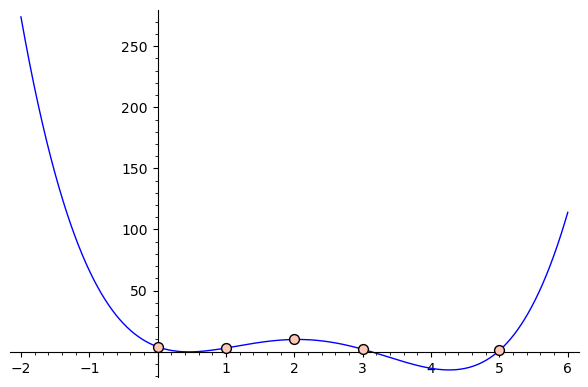

In [63]:
G

Escriviu una funció que prengui com entrada una funció matemàtica, un interval $[a, b]$ i un natural $n$ i retorni el polinomi interpolador de la funció en els $n+1$ punts resultant de dividir l'interval en $n$ subintervals d'igual longitud.

In [64]:
'''
f : funció
a, b : extrems de l'interal
n : enter positiu
'''
def interpolate_function(f, a, b, n):
    h = (b - a) / n
    llista = []
    for i in range(n+1):
        ai = a + i * h
        bi = f(ai)
        llista.append((ai, bi))
    return interpolate(llista)

Grafiqueu a la vegada la funció $\sin(x)$ i el polinomi interpolador de grau $n$ en l'interval $[-2\pi, 2\pi]$ per $n$ des de $1$ fins a $20$.

In [65]:
a = -2*pi
b = 2*pi
x = QQ['x'].gen()
def f(x):
    return sin(x)
p1 = plot(f, xmin=2*a, xmax=2*b, color = 'red')
@interact
def myplot(n = (1,20)):
    p2 = plot(interpolate_function(f, a, b, n), xmin = 2*a, xmax = 2*b, color = 'blue')
    p3 = scatter_plot([(a+i * (b-a)/n, f(a+i*(b-a)/n)) for i in range(n+1)],marker='.')
    p = p1+p2+p3
    p.axes_range(ymin=-2, ymax=2)
    p.show()

Interactive function <function myplot at 0x7f416b403280> with 1 widget
  n: IntSlider(value=10, description='n…

Feu el mateix per la funció $f(x)=\frac{1}{1+25x^2}$, i l'interval $[-1, 1]$.

In [66]:
a = -1
b = 1
x = QQ['x'].gen()
def f(x):
    return 1/(1+25*x**2)
p1 = plot(f, xmin=2*a, xmax=2*b, color = 'red')
@interact
def myplot(n = (1,20)):
    p2 = plot(interpolate_function(f, a, b, n), xmin = 2*a, xmax = 2*b, color = 'blue')
    p3 = scatter_plot([(a+i * (b-a)/n, f(a+i*(b-a)/n)) for i in range(n+1)],marker='.')
    p = p1+p2+p3
    p.axes_range(ymin=-2, ymax=2)
    p.show()

Interactive function <function myplot at 0x7f416b4033a0> with 1 widget
  n: IntSlider(value=10, description='n…

## Art amb matrius

L'objectiu és el d'aconseguir una matriu d'enters que "reprodueixi" una imatge. El bloc de codi que teniu a sota carrega una imatge a memòria.

In [67]:
import pylab, numpy, urllib.request

url = 'https://upload.wikimedia.org/wikipedia/commons/4/4d/Uhlenbeck_Karen_1982_%28cropped%29.jpg'
A = pylab.imread(urllib.request.urlopen(url), format='jpeg')

# Per imatges en color. Per imatges en blanc i negre no cal fer res
if len(A.shape) == 3:
    A = .3 * A[:,:,0] + .59 * A[:,:,1] + .11 * A[:,:,2]

# Volem els valors de la matriu entre 0 i 1
A = 1/A.max() * A

# Finalment, declarem una matriu en Sage.
B = Matrix(A)

Escriviu una funció que, donada una matriu i un nombre de files objectiu, retorni una nova matriu de tantes files com s'ha especificat (i amb el nombre de columnes proporcional a l'original), i on les entrades de la nova matriu siguin les mitjanes aritmètiques de les entrades d'un bloc de la matriu original.

In [68]:
def reduce_resolution(A, nrows, distort=1.0):
    # First, crop the image to have multiples in each direction
    qx, rx = ZZ(A.nrows()).quo_rem(nrows)
    ncols = ZZ((distort * A.ncols() * nrows / A.nrows()).round())
    qy, ry = ZZ(A.ncols()).quo_rem(ncols)
    x0 = rx // 2
    y0 = ry // 2
    A = A.submatrix(x0, y0, nrows * qx, ncols * qy)
    B = Matrix(RR, nrows, ncols, 0)
    for i in range(nrows):
        for j in range(ncols):
            # Compute the average value of the entries in the block
            Aij = A.submatrix(qx * i, qy * j, qx, qy)
            v = Aij.list()
            B[i, j] = sum(v) / len(v)
    return B

El següent bloc de codi inicialitza una llista (Python 'list') on cada element és una parella (Python 'tuple') `(t, i)`, amb `t` el percentatge aproximat de píxels negres del dígit `i`.
La llista s'ordena per ordre creixent de `t`.

In [69]:
# Llista obtinguda de http://www.pouet.net/topic.php?which=8056&page=1
numb = list(reversed("@MBHENR#KWXDFPQASUZbdehx*8Gm&04LOVYkpq5Tagns69owz$CIu23Jcfry%1v7l+it[] {}?j|()=~!-/<>\"^_';,:`. "))
table = sorted([(numb.index(str(i)) * 1.0/len(numb), i) for i in range(10)])
for threshold, digit in table:
    print("%s: \t %s"%(threshold, digit))

0.326315789473684: 	 7
0.347368421052632: 	 1
0.421052631578947: 	 3
0.431578947368421: 	 2
0.515789473684211: 	 9
0.526315789473684: 	 6
0.589473684210526: 	 5
0.673684210526316: 	 4
0.684210526315789: 	 0
0.726315789473684: 	 8


Escriviu una funció que, donada una matriu i la taula anterior, retorni una nova matriu on cada entrada conté un dígit del 0 al 9 corresponent al valor de `t` que tingui més proper.

In [70]:
def assign_digit(x, table):
    for r, out in table:
        if r > x:
            return out
    return table[-1][1]

Fent servir les funcions anteriors, obtingueu una matriu de 80 files amb entrades enteres entre 0 i 9 i enganxeu el resultat a ``www.editpad.org``.

In [71]:
C = reduce_resolution(B, 80, 1.0)
D = C.apply_map(lambda x:1-x).apply_map(lambda x:assign_digit(x,table))
print(D.str())

[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 3 3 3 3 9 4 4 4 4 5 9 6 5 5 8 8 8 8 8 8 4 9 3 1 7 7 7 9 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 4]
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 5 9 3 3 7 7 7 1 9 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 3 3 1 7 7 7 7 1 9 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 1 7 7 7 7 7 7 1 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 9 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 5 7 7 7 7 7 7 7 7 9 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 5 2 5 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 0]
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 7 7 7 7 7 7 7 1 9 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 3 9 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 5]
[8 8 8 8 8 8 8 8 8 8 8 8 8 8

In [30]:
R = QQ['t']

In [42]:
R([4,0,0,5]) # 4 + 0 * t + 0 * t^2 + 5 * t^3

5*t^3 + 4

In [39]:
PolynomialRing?

In [33]:
f.parent()

Univariate Polynomial Ring in t over Rational Field

In [35]:
f.degree()

0

In [40]:
_.<u> = QQ[]

In [41]:
u.parent()

Univariate Polynomial Ring in u over Rational Field

In [21]:
u.parent() == M

True

In [26]:
type(x)

<class 'sage.symbolic.expression.Expression'>

In [27]:
type(y)

NameError: name 'y' is not defined